In [2]:
from tsp_annealing import *
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
opt_distance_51, opt_distance_280, opt_distance_442 = calculate_optimal_distances()

cities_51 = load_graph('TSP-Configurations/eil51.tsp.txt')
cities_280 = load_graph('TSP-Configurations/a280.tsp.txt')
cities_442 = load_graph('TSP-Configurations/pcb442.tsp.txt')

distances_51 = calculate_distances(cities_51)
distances_280 = calculate_distances(cities_280)
distances_442 = calculate_distances(cities_442)

In [4]:
def load_data_file(file_path):
    data = []
    max_iter_list = []

    with open(file_path, 'r') as csvfile:
        reader = csv.reader(csvfile)
        header_skipped = False
        max_iters_obtained = False

        for row in reader:
            if not header_skipped:
                header_skipped = True
            elif not max_iters_obtained:
                max_iters_obtained = True
                max_iter_list = [int(val) for val in row]  # Extract number of iterations
                col_count = len(max_iter_list)  # Count of columns
                data = [[] for _ in range(col_count)]  # Create sublists for each column
            else:
                for i in range(col_count):
                    data[i].append(float(row[i]))  # Append data to corresponding column sublist

    return data, max_iter_list

def load_experiment(filepaths, labels):
    results = {}
    for (filepath, label) in zip(filepaths, labels):
        temp, max_iter_list = load_data_file(filepath)
        results[label] = temp
    return results, max_iter_list 

def plot_comparison(results, max_iterations_list, param_labels):
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'magenta', 'darkgreen']

    opt_distance_line = [opt_distance_280 for _ in max_iterations_list]

    for i, param_label in enumerate(param_labels):
        means = np.array([np.mean(elem) for elem in results[param_label]])
        stds = np.array([np.std(elem) for elem in results[param_label]])
        z_score = 1.96 

        conf_intervals = np.column_stack([
        means - z_score * (stds / np.sqrt(len(means))),
        means + z_score * (stds / np.sqrt(len(means)))
        ])

        lower_bounds = np.array([interval[0] for interval in conf_intervals])
        upper_bounds = np.array([interval[1] for interval in conf_intervals])

        plt.plot(max_iterations_list, means, marker='o', linestyle='-', color=colors[i], label=param_label)
        plt.fill_between(max_iterations_list, lower_bounds, upper_bounds, alpha=0.3)
        
    plt.plot(max_iterations_list, opt_distance_line, linestyle='--', color='black', label='Optimal Distance')
    plt.title('Mean Distance over Number of Max Iterations')
    plt.xlabel('Max Iterations')
    plt.ylabel('Mean Distance')
    plt.legend()
    plt.show()

def plot_distributions(results, param_labels):
    fig, axs = plt.subplots(1, len(param_labels), figsize=(10, 2))
    for i, param_label in enumerate(param_labels):
        axs[i].hist(results[i])
        axs[i].set_title(param_label)

plt.style.use('default')


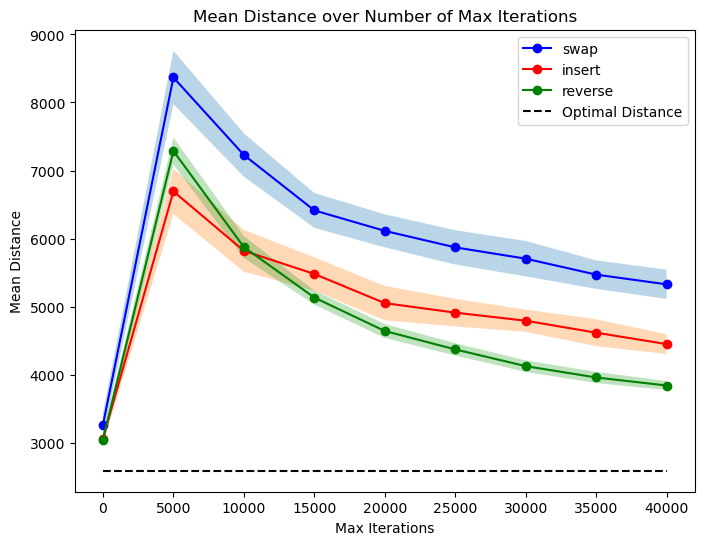

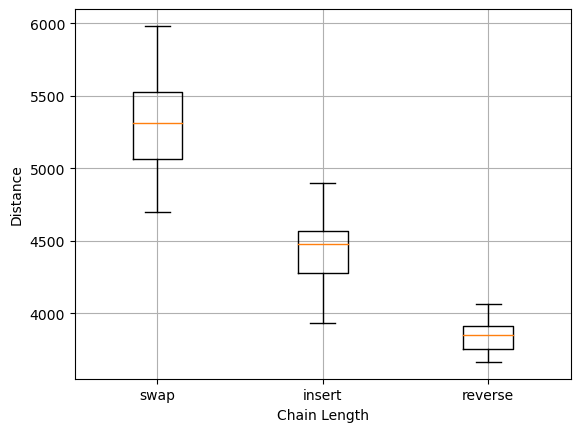

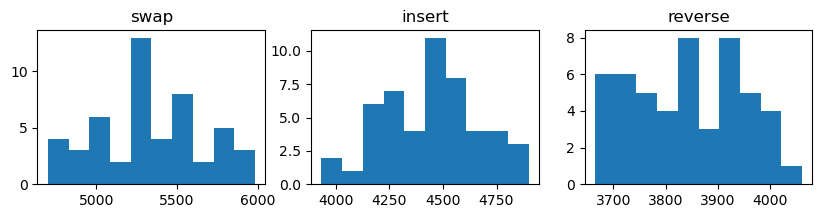

In [80]:
filepaths = [
    'generated_data/dist_perm_operator-swap_maxiter40001.csv', 
    'generated_data/dist_perm_operator-insert_maxiter40001.csv',
    'generated_data/dist_perm_operator-reverse_maxiter40001.csv'
    ]
labels = ['swap', 'insert', 'reverse']

data_perm_operators, max_iter_list = load_experiment(filepaths, labels)
plot_comparison(data_perm_operators, max_iter_list, param_labels=labels)


final_dists_perm_operators = [data_perm_operators[perm_operator][-1] for perm_operator in labels]
plt.boxplot(final_dists_perm_operators, labels=labels)
plt.xlabel('Chain Length')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

plot_distributions(final_dists_perm_operators, labels)

n = 50
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4698.8317853192875, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3933.021864290813, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3664.6589677487455, statistic_sign=-1)
ShapiroResult(statistic=0.9774278402328491, pvalue=0.4493139386177063)
ShapiroResult(statistic=0.9854390621185303, pvalue=0.7903095483779907)
ShapiroResult(statistic=0.964754045009613, pvalue=0.1405692994594574)
MannwhitneyuResult(statistic=2477.0, pvalue=2.784421099071257e-17)
MannwhitneyuResult(statistic=2500.0, pvalue=7.066071930388932e-18)
MannwhitneyuResult(statistic=2488.0, pvalue=1.4496003158260807e-17)


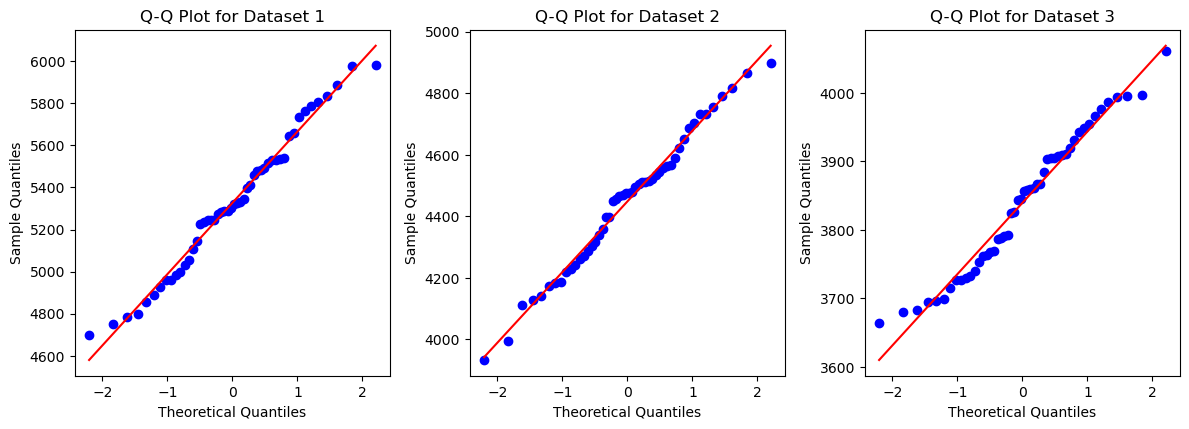

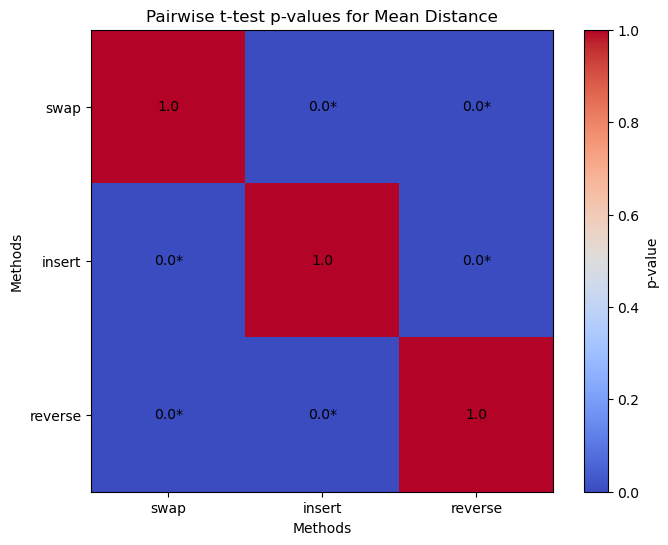

In [82]:
print(f'n = {len(final_dists_perm_operators[0])}')

for data in final_dists_perm_operators:
    print(stats.kstest(data, 'norm'))

for data in final_dists_perm_operators:
    print(stats.shapiro(data))

for i in range(len(final_dists_perm_operators)):
    for j in range(i, len(final_dists_perm_operators)):
        if i != j:
            data1 = final_dists_perm_operators[i]
            data2 = final_dists_perm_operators[j]
            print(stats.mannwhitneyu(data1, data2))

plt.figure(figsize=(12, 8)) 

for idx, data in enumerate(final_dists_perm_operators):
    plt.subplot(2, 3, idx + 1) 
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Dataset {idx + 1}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

plot_pairwise_ttest(final_dists_perm_operators, labels)

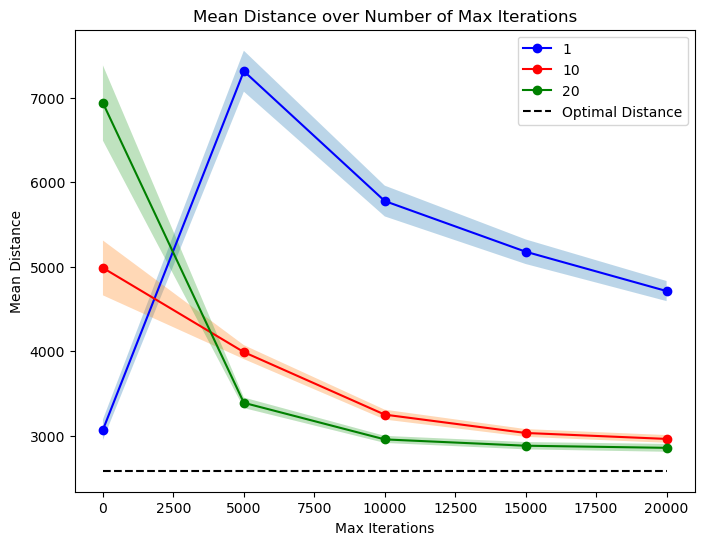

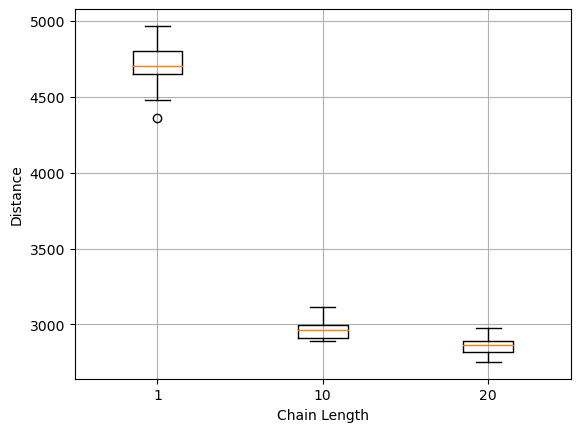

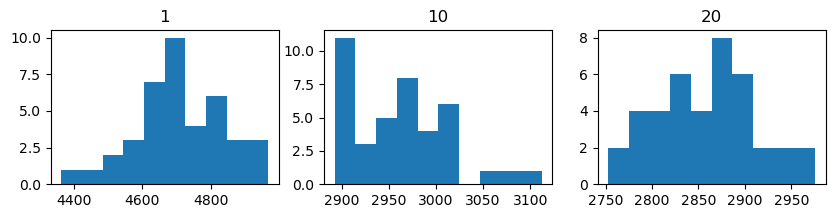

In [78]:
filepaths = [
    'generated_data/dist_chain_length-1_maxiter20001_numruns40.csv', 
    'generated_data/dist_chain_length-10_maxiter20001_numruns40.csv',
    'generated_data/dist_chain_length-20_maxiter20001_numruns40.csv'
    ]

labels = [1, 10, 20]

data_chain_length, max_iter_list = load_experiment(filepaths, labels)
plot_comparison(data_chain_length, max_iter_list, param_labels=labels)


final_dists_chain_length = [data_chain_length[length][-1] for length in labels]
plt.boxplot(final_dists_chain_length, labels=labels)
plt.xlabel('Chain Length')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

plot_distributions(final_dists_chain_length, labels)

n = 40
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=4362.896581008363, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2892.2432414304285, statistic_sign=-1)
KstestResult(statistic=1.0, pvalue=0.0, statistic_location=2752.6368091308823, statistic_sign=-1)
ShapiroResult(statistic=0.9791607856750488, pvalue=0.6583941578865051)
ShapiroResult(statistic=0.931077241897583, pvalue=0.017466334626078606)
ShapiroResult(statistic=0.9835460186004639, pvalue=0.8173450231552124)
MannwhitneyuResult(statistic=1600.0, pvalue=1.435085306393668e-14)
MannwhitneyuResult(statistic=1600.0, pvalue=1.435085306393668e-14)
MannwhitneyuResult(statistic=1493.0, pvalue=2.6722854387392303e-11)


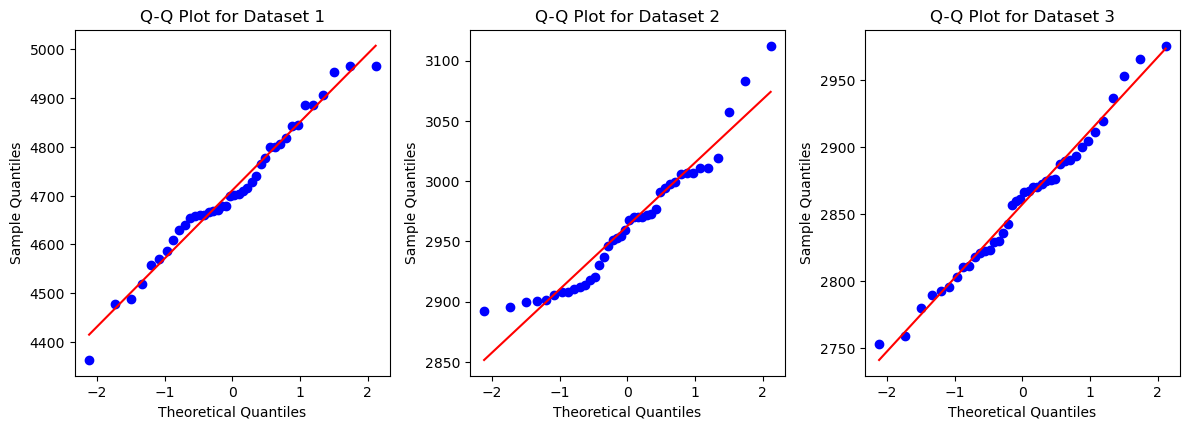

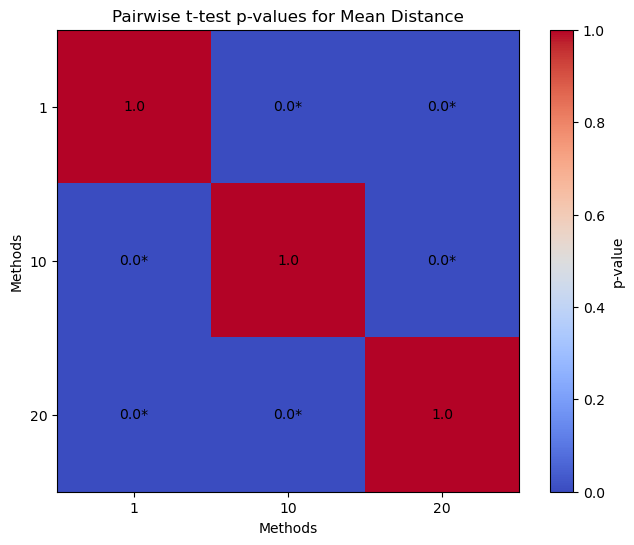

In [79]:
print(f'n = {len(final_dists_chain_length[0])}')

for data in final_dists_chain_length:
    print(stats.kstest(data, 'norm'))

for data in final_dists_chain_length:
    print(stats.shapiro(data))

for i in range(len(final_dists_chain_length)):
    for j in range(i, len(final_dists_chain_length)):
        if i != j:
            data1 = final_dists_chain_length[i]
            data2 = final_dists_chain_length[j]
            print(stats.mannwhitneyu(data1, data2))

plt.figure(figsize=(12, 8)) 

for idx, data in enumerate(final_dists_chain_length):
    plt.subplot(2, 3, idx + 1) 
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for Dataset {idx + 1}')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Sample Quantiles')

plt.tight_layout()
plt.show()

plot_pairwise_ttest(final_dists_perm_operators, labels)



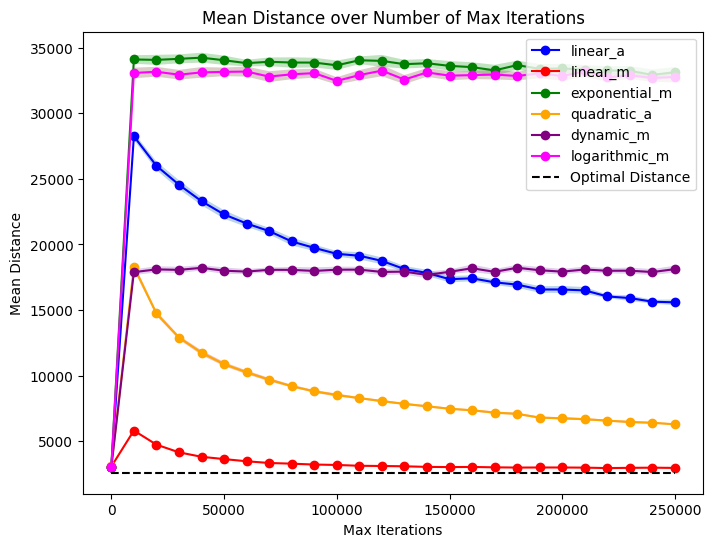

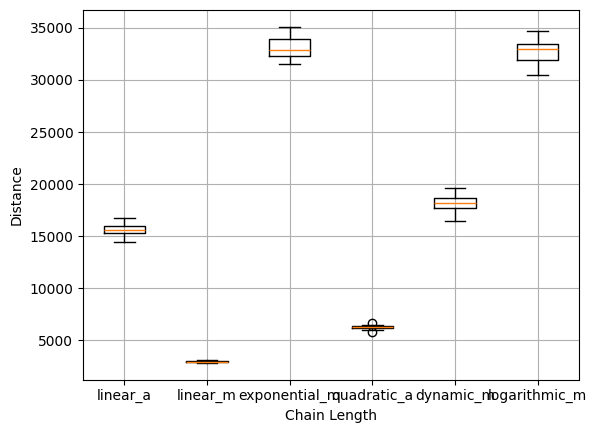

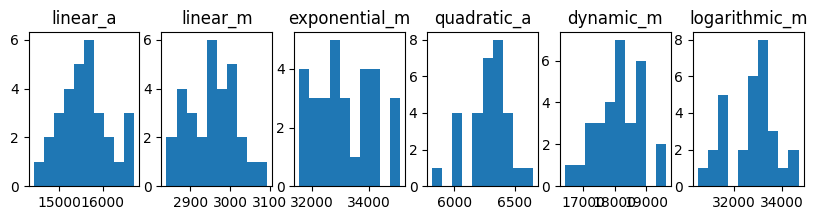

In [7]:
labels = ['linear_a', 'linear_m', 'exponential_m', 'quadratic_a', 'dynamic_m', 'logarithmic_m']

filepaths = []
maxiter = 250001
for label in labels:
    filepaths.append(f'generated_data/schedules/dist_schedule-{label}_maxiter{maxiter}.csv')

data_schedules, max_iter_list = load_experiment(filepaths, labels)
plot_comparison(data_schedules, max_iter_list, param_labels=labels)


final_dists_schedules = [data_schedules[length][-1] for length in labels]
plt.boxplot(final_dists_schedules, labels=labels)
plt.xlabel('Chain Length')
plt.ylabel('Distance')
plt.grid(True)
plt.show()

final_dists_schedules = [data_schedules[label][-1] for label in labels]
plot_distributions(final_dists_schedules, labels)

ShapiroResult(statistic=0.9808970093727112, pvalue=0.8488753437995911)
ShapiroResult(statistic=0.9789819717407227, pvalue=0.7978826761245728)
ShapiroResult(statistic=0.9482972025871277, pvalue=0.15217934548854828)
ShapiroResult(statistic=0.9490444660186768, pvalue=0.15937550365924835)
ShapiroResult(statistic=0.984257698059082, pvalue=0.9238871335983276)
ShapiroResult(statistic=0.9489993453025818, pvalue=0.1589316725730896)


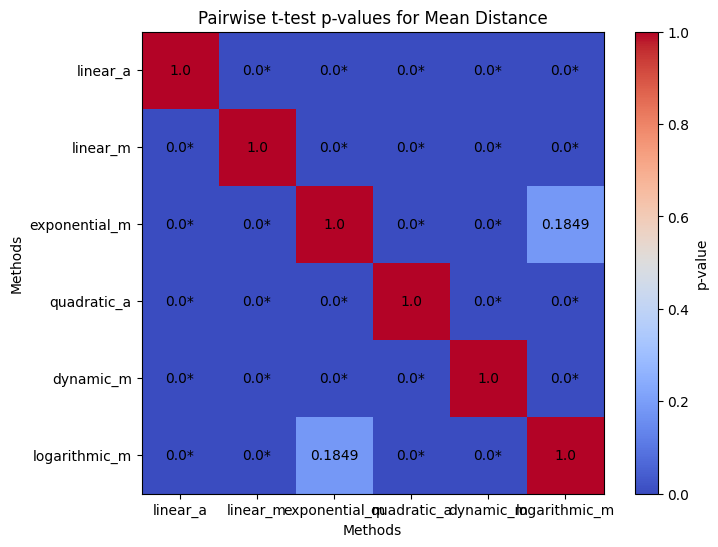

In [8]:
for data in final_dists_schedules:
    print(stats.shapiro(data))

plot_pairwise_ttest(final_dists_schedules, labels)